# Setup

## Imports

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import utilities
from utils import setuputil, trainutil, inferutil
from classes.models import SimpleGeluEmbed

# Reload the necessary modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(SimpleGeluEmbed)

# Import the required utils
from utils.setuputil import setup_simple_config, display_simple_config
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SimpleGeluEmbedAdd class
from classes.models.SimpleGeluEmbed import SimpleGeluEmbedAvg

## Config Setup

In [2]:
# Define the input configuration for the simple model
setup_config = {
    # Environment and Model Info
    "env": "gcp",                
    "approach": "simple",         
    "model_name": "SimpleGeluEmbedAvg",
    
    # System Configuration
    "device": "cuda:0",
    "threads": 12,
    "seed": 42,
    
    # Data Configuration
    "data_dir": "../../data/farzan",
    "data_ds": "manual",
    
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    
    # Vocabulary Parameters
    "vocab_size": 150000,
    "vocab_space": True,
    "vocab_case": "both",
    
    # Training Parameters
    "batch": 40,
    "lr": 1e-1,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 10,
    "save_dir": '../models/'
}

# Setup the configuration using setuputil and display it
config = setup_simple_config(setup_config)
display_simple_config(config)

# Define local variables from the config dictionary
# System variables
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
spreadsheet_vocab = config["vocab"]
spreadsheet_wvs = config["wvs"]

# Training parameters
batch_size = config["batch"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]


Getting Vocab: 100%|████████████████████████████| 40/40 [00:03<00:00, 12.56it/s]


40(P) = 40(G) + 0(E)
Unique Tokens: 5593
Vocab Size: 5597


Creating Word Embeddings: 100%|██████████| 5597/5597 [00:00<00:00, 72242.15it/s]


Word Embeddings Shape: torch.Size([5597, 50])


Processing files: 100%|█████████████████████████| 40/40 [00:01<00:00, 37.37it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|█████████████████████████| 5/5 [00:00<00:00, 4468.68it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|█████████████████████████| 5/5 [00:00<00:00, 5391.14it/s]



5(P) = 5(G) + 0(E)

Final configuration:
{
  "env": "gcp",
  "approach": "simple",
  "model_name": "SimpleGeluEmbedAvg",
  "DEVICE": "cuda:0",
  "THREADS": 12,
  "seed": 42,
  "data_dir": "../../data/farzan",
  "data_ds": "manual",
  "train_dir": "../../data/farzan/manual_train",
  "val_dir": "../../data/farzan/manual_val",
  "test_dir": "../../data/farzan/manual_test",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "vocab_size": 5597,
  "vocab_space": true,
  "vocab_case": "both",
  "vocab": "<Vocab Object>",
  "wvs": "<Embedding Tensor>",
  "train_loader": "<Train SpreadsheetDataLoader Object>",
  "val_loader": "<Validation SpreadsheetDataLoader Object>",
  "test_loader": "<Test SpreadsheetDataLoader Object>",
  "batch": 40,
  "lr": 0.1,
  "mu": 0.25,
  "epochs": 20,
  "patience": 2,
  "save_int": 10,
  "save_dir": "../models/",
  "save_name": "gsim42_SimpleGeluEmbedAvg_manual_100x100x32_bSp5k_bsz40lr1e-1ep20pa2"
}


# Model Training

## Define the model

In [3]:
# Define the untrained model and move it to the device
untrained_model = SimpleGeluEmbedAvg(spreadsheet_wvs).to(DEVICE)
print(untrained_model)

SimpleGeluEmbedAvg(
  (_embed): Embedding(5597, 50)
  (_drop): Dropout(p=0.05, inplace=False)
  (_non_linear): GELU(approximate='none')
  (_pred): Linear(in_features=50, out_features=1, bias=True)
)


## Train the Model

In [4]:
trained_model = train_model(
    model=untrained_model,
    train_data=train_loader, 
    val_data=val_loader, 
    DEVICE=DEVICE, 
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config
)

Epoch 0


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.77257239818573, Perplexity: 1.0000177258810834
Val Loss: 0.6548740267753601, Perplexity: 1.0000065487617107


Epoch 1


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 0.6655376553535461, Perplexity: 1.0000066553987006
Val Loss: 0.4066166281700134, Perplexity: 1.0000040661745486


Epoch 2


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.61s/it]


Train Loss: 0.40872201323509216, Perplexity: 1.000004087228485
Val Loss: 0.3377818167209625, Perplexity: 1.000003377823872


Epoch 3


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.65s/it]


Train Loss: 0.3398129642009735, Perplexity: 1.0000033981354157
Val Loss: 0.34999874234199524, Perplexity: 1.0000034999935483


Epoch 4


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.61s/it]


Train Loss: 0.34511300921440125, Perplexity: 1.0000034511360474
Val Loss: 0.3129536509513855, Perplexity: 1.0000031295414065


Epoch 5


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.61s/it]


Train Loss: 0.3140209913253784, Perplexity: 1.0000031402148437
Val Loss: 0.3154143989086151, Perplexity: 1.0000031541489633


Epoch 6


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 0.31196776032447815, Perplexity: 1.0000031196824695
Val Loss: 0.2869951128959656, Perplexity: 1.0000028699552472


Epoch 7


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 0.28805768489837646, Perplexity: 1.000002880580998
Val Loss: 0.28063681721687317, Perplexity: 1.00000280637211


Epoch 8


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 0.2790367901325226, Perplexity: 1.0000027903717945
Val Loss: 0.26742202043533325, Perplexity: 1.00000267422378


Epoch 9


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.64s/it]


Train Loss: 0.2687374949455261, Perplexity: 1.0000026873785604
Val Loss: 0.2604251801967621, Perplexity: 1.000002604255193

Model Saved

Epoch 10


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 0.26110780239105225, Perplexity: 1.0000026110814328
Val Loss: 0.25038865208625793, Perplexity: 1.0000025038896556


Epoch 11


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 0.25309497117996216, Perplexity: 1.0000025309529146
Val Loss: 0.24344007670879364, Perplexity: 1.0000024344037302


Epoch 12


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.64s/it]


Train Loss: 0.24591268599033356, Perplexity: 1.0000024591298835
Val Loss: 0.23437660932540894, Perplexity: 1.00000234376884


Epoch 13


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.63s/it]


Train Loss: 0.2394736409187317, Perplexity: 1.0000023947392767
Val Loss: 0.2278386801481247, Perplexity: 1.000002278389397


Epoch 14


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.63s/it]


Train Loss: 0.23135265707969666, Perplexity: 1.000002313529247
Val Loss: 0.21909460425376892, Perplexity: 1.0000021909484427


Epoch 15


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 0.22481927275657654, Perplexity: 1.0000022481952549
Val Loss: 0.21295155584812164, Perplexity: 1.0000021295178259


Epoch 16


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 0.21807877719402313, Perplexity: 1.0000021807901498
Val Loss: 0.20443807542324066, Perplexity: 1.000002044382844


Epoch 17


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 0.21201667189598083, Perplexity: 1.0000021201689666
Val Loss: 0.19923624396324158, Perplexity: 1.0000019923644243


Epoch 18


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 0.2060946375131607, Perplexity: 1.000002060948499
Val Loss: 0.19068101048469543, Perplexity: 1.0000019068119228


Epoch 19


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.61s/it]

Train Loss: 0.19849054515361786, Perplexity: 1.0000019849074215
Val Loss: 0.18611028790473938, Perplexity: 1.0000018611046109

Model Saved


TRAINING DONE at epoch 19, best epoch 19
Train Loss = 0.19849054515361786, Perplexity = 1.0000019849074215
Val Loss = 0.18611028790473938, Perplexity = 1.0000018611046109


# Evaluation

In [5]:
# Define params for evaluation
thresh = 0.91
loc = 0
cond = '>'
disp_max=True

## Single Example


Filename: ../../data/farzan/manual_train/Harassment-Bullying-on-basis-of-race_reported.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(6,1): 0.910926
(5,3): 0.919266
(5,22): 0.923887
(4,5): 0.925749
(1,1): 0.928361
(5,18): 0.928877
(4,11): 0.930954
(3,1): 0.933952
(5,4): 0.940938
(3,2): 0.951473
(3,3): 0.951512
(3,23): 0.957599
(4,9): 0.971595
(4,15): 0.972176
(3,21): 0.974147
(3,24): 0.978472
(4,3): 0.980506
(4,7): 0.982976
(4,13): 0.987759
(3,17): 0.988877
(3,19): 0.994104

NB to B ratio: Predicted = 9928:72 | Actual = 9930:70
Accuracy: 99.98% | Precision: 97.22% | Recall: 100.00% | F1-Score: 0.99



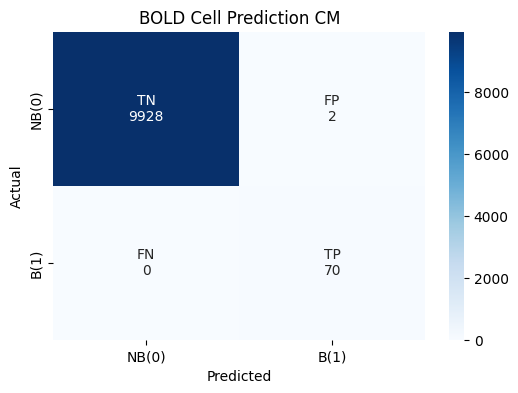


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../../data/farzan/manual_val/advanced-placement-mathematics-enrollment.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,3): 0.919266
(5,18): 0.923887
(4,5): 0.925749
(4,11): 0.930954
(3,1): 0.933952
(5,4): 0.940938
(3,2): 0.951473
(3,3): 0.951512
(3,21): 0.957599
(1,1): 0.966913
(4,9): 0.971595
(4,15): 0.972176
(3,19): 0.974147
(3,22): 0.978472
(4,3): 0.980506
(4,7): 0.982976
(4,13): 0.987759
(3,17): 0.990867

NB to B ratio: Predicted = 9935:65 | Actual = 9937:63
Accuracy: 99.98% | Precision: 96.92% | Recall: 100.00% | F1-Score: 0.98



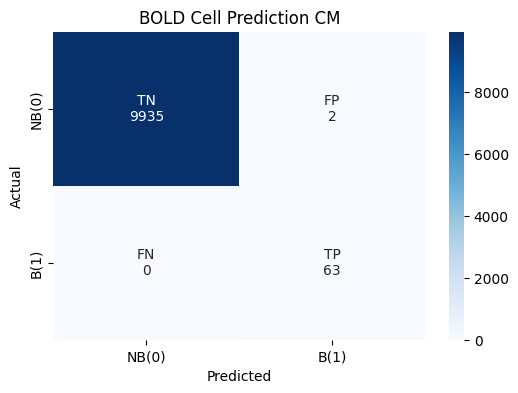


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0



Filename: ../../data/farzan/manual_test/dlportfolio-by-school-type.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(4,2): 0.917847
(4,10): 0.919846
(6,0): 0.921101
(4,8): 0.922242
(19,0): 0.922488
(15,0): 0.924119
(6,1): 0.924552
(11,0): 0.925448
(7,0): 0.926865
(9,1): 0.927231
(7,1): 0.927613
(4,4): 0.930007
(8,1): 0.930167
(4,6): 0.933742
(5,0): 0.965414
(5,3): 0.985189
(0,0): 0.985625
(5,2): 0.994569
(5,4): 0.995073

NB to B ratio: Predicted = 9935:65 | Actual = 9936:64
Accuracy: 99.99% | Precision: 98.46% | Recall: 100.00% | F1-Score: 0.99



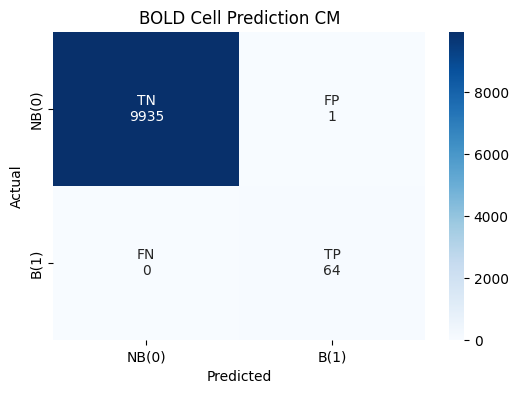


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check with single example
infer_one(trained_model, train_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, val_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, test_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)

## All Examples

Batch Inference: 100%|████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 396655:3345 | Actual = 396714:3286
Accuracy: 99.98% | Precision: 98.09% | Recall: 99.85% | F1-Score: 0.99



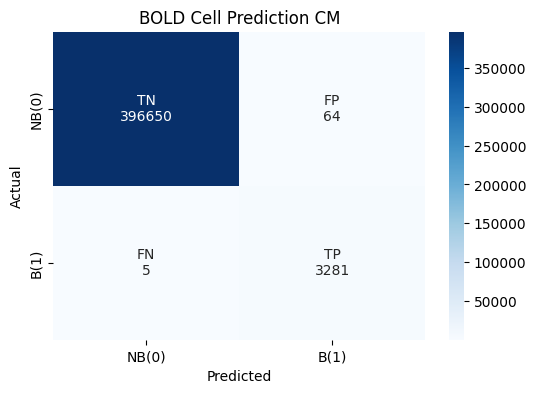

In [7]:
# Evaluate the model on all train files
infer_full(trained_model, train_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49594:406 | Actual = 49602:398
Accuracy: 99.98% | Precision: 98.03% | Recall: 100.00% | F1-Score: 0.99



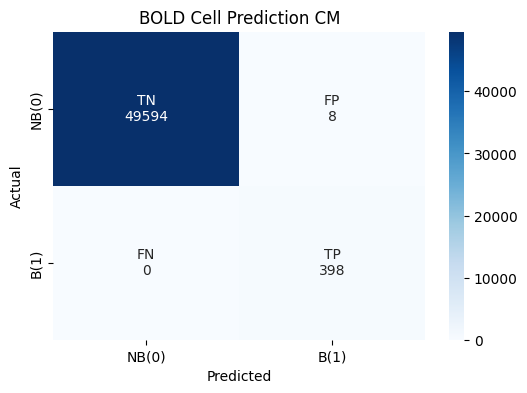

In [8]:
# All val files
infer_full(trained_model, val_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49614:386 | Actual = 49606:394
Accuracy: 99.94% | Precision: 97.41% | Recall: 95.43% | F1-Score: 0.96



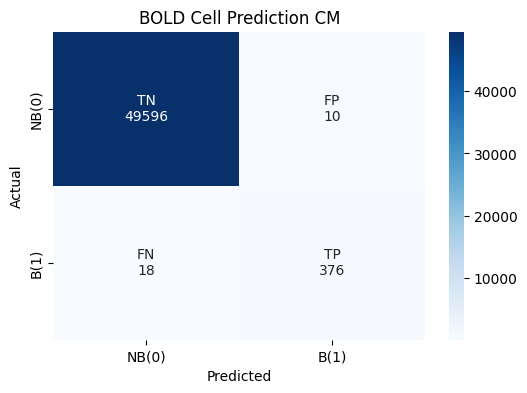

In [9]:
# All test files
infer_full(trained_model, test_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)